In [193]:
import os
import json
import matplotlib.pylab as plt

In [194]:
all_metrics = {}
for _dir in os.listdir():
    if (_dir.split('_')[0] =='room' and abs(int(_dir.split('#')[-1])) <=20):
        with open(f'{_dir}/metrics.json','r') as f:
            mm = json.load(f)
        all_metrics[(int(_dir.split('#')[-1]))] = mm

In [195]:
pesq_noisy = []
pesq_enhanced_demucs = []
pesq_enhanced_spectral_sub = []

for key, value in all_metrics.items():
    pesq_noisy.append((key, value['pesq_noisy']))
    pesq_enhanced_demucs.append((key,value['pesq_enhanced_demucs']))
    pesq_enhanced_spectral_sub.append((key, value['pesq_enhanced_spectral_sub']))

In [196]:
stoi_noisy = []
stoi_enhanced_demucs = []
stoi_enhanced_spectral_sub = []

for key, value in all_metrics.items():
    stoi_noisy.append((key, value['stoi_noisy']))
    stoi_enhanced_demucs.append((key,value['stoi_enhanced_demucs']))
    stoi_enhanced_spectral_sub.append((key, value['stoi_enhanced_spectral_sub']))

In [197]:
stoi_noisy.sort(key= lambda x: x[0])
stoi_enhanced_demucs.sort(key = lambda x: x[0])
stoi_enhanced_spectral_sub.sort(key = lambda x: x[0])

In [198]:
stoi_noisy

[(-20, 0.41499185231919244),
 (-15, 0.4833925741003448),
 (-10, 0.5641963821675524),
 (-5, 0.6637458927187522),
 (0, 0.74841906088796),
 (5, 0.8222593887682685),
 (10, 0.8834888046026788),
 (15, 0.9240599766904911),
 (20, 0.9519293782257833)]

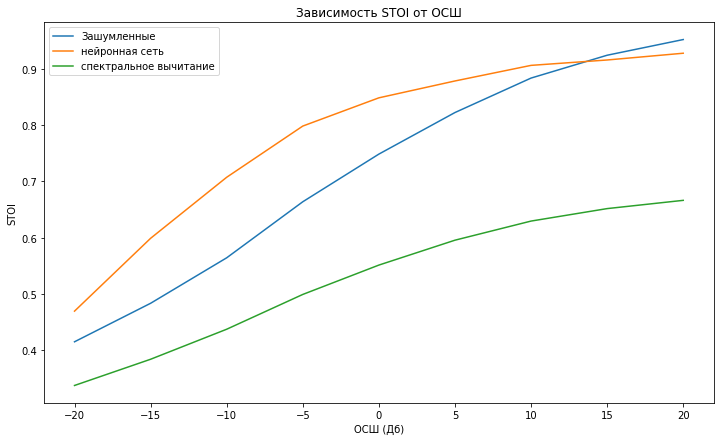

In [199]:
plt.figure(figsize=(12,7))
plt.plot([x[0] for x in stoi_noisy], [x[1] for x in stoi_noisy], label = 'Зашумленные')
plt.plot([x[0] for x in stoi_enhanced_demucs], [x[1] for x in stoi_enhanced_demucs], label = 'нейронная сеть')
plt.plot([x[0] for x in stoi_enhanced_spectral_sub], [x[1] for x in stoi_enhanced_spectral_sub], label = 'спектральное вычитание')

plt.xlabel('ОСШ (Дб)')
plt.ylabel('STOI')
plt.title('Зависимость STOI от ОСШ')
plt.legend()
plt.savefig('STOI.png')
plt.show()

In [200]:
pesq_noisy.sort(key= lambda x: x[0])
pesq_enhanced_demucs.sort(key = lambda x: x[0])
pesq_enhanced_spectral_sub.sort(key = lambda x: x[0])

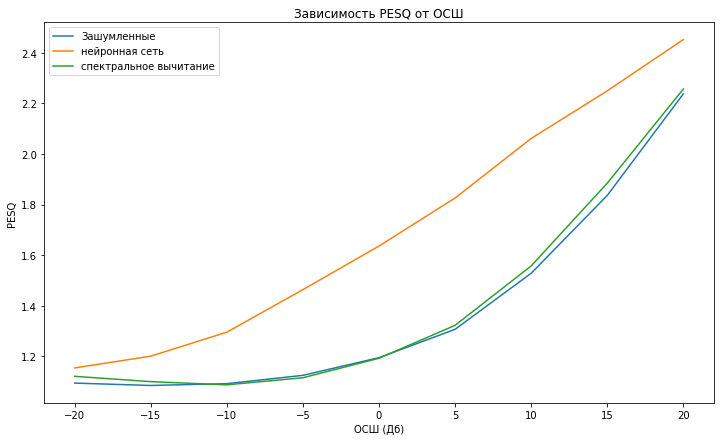

In [201]:
plt.figure(figsize=(12,7))
plt.plot([x[0] for x in pesq_noisy], [x[1] for x in pesq_noisy], label = 'Зашумленные')
plt.plot([x[0] for x in pesq_enhanced_demucs], [x[1] for x in pesq_enhanced_demucs], label = 'нейронная сеть')
plt.plot([x[0] for x in pesq_enhanced_spectral_sub], [x[1] for x in pesq_enhanced_spectral_sub], label = 'спектральное вычитание')

plt.xlabel('ОСШ (Дб)')
plt.ylabel('PESQ')
plt.title('Зависимость PESQ от ОСШ')
plt.legend()
plt.savefig('PESQ.png')
plt.show()

In [202]:
wer_clean = []
wer_noisy = []
wer_enhanced_demucs = []
wer_enhanced_spectral_sub = []

for key, value in all_metrics.items():
    wer_noisy.append((key, value['wer_noisy']))
    wer_enhanced_demucs.append((key,value['wer_enhanced_demucs']))
    wer_enhanced_spectral_sub.append((key, value['wer_enhanced_spectral_sub']))
    wer_clean.append((key, value['wer_clean']))

In [203]:
wer_clean.sort(key = lambda x:x[0])
wer_noisy.sort(key= lambda x: x[0])
wer_enhanced_demucs.sort(key = lambda x: x[0])
wer_enhanced_spectral_sub.sort(key = lambda x: x[0])

In [204]:
wer_noisy

[(-20, 0.9473515248796147),
 (-15, 0.9076511503477795),
 (-10, 0.8382022471910112),
 (-5, 0.7075441412520064),
 (0, 0.5612627073301231),
 (5, 0.43434991974317816),
 (10, 0.33654360620652757),
 (15, 0.28657035848047085),
 (20, 0.2524344569288389)]

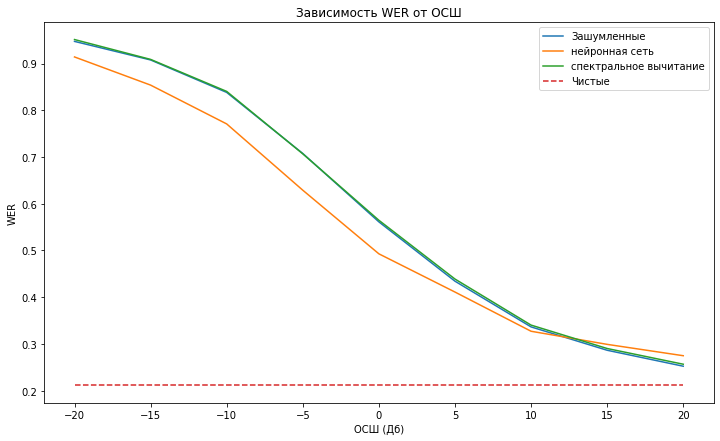

In [205]:
plt.figure(figsize=(12,7))
plt.plot([x[0] for x in wer_noisy], [x[1] for x in wer_noisy], label = 'Зашумленные')
plt.plot([x[0] for x in wer_enhanced_demucs], [x[1] for x in wer_enhanced_demucs], label = 'нейронная сеть')
plt.plot([x[0] for x in wer_enhanced_spectral_sub], [x[1] for x in wer_enhanced_spectral_sub], label = 'спектральное вычитание')
plt.plot([x[0] for x in wer_clean], [x[1] for x in wer_clean], label = 'Чистые', linestyle='--')
plt.xlabel('ОСШ (Дб)')
plt.ylabel('WER')
plt.title('Зависимость WER от ОСШ')
plt.legend()
plt.savefig('WER.png')
plt.show()

# WER for different noise types

In [209]:
wer_clean_res = []
wer_noisy_res = {}
wer_enhanced_res = {}

for _type in ['room', 'human','street']:
    all_metrics = {}
    for _dir in os.listdir():
        if (_dir.split('_')[0] ==_type and abs(int(_dir.split('#')[-1])) <=20):
            with open(f'{_dir}/metrics.json','r') as f:
                mm = json.load(f)
            all_metrics[(int(_dir.split('#')[-1]))] = mm
            
    wer_clean = []
    wer_noisy = []
    wer_enhanced_demucs = []
    wer_enhanced_spectral_sub = []

    for key, value in all_metrics.items():
        wer_noisy.append((key, value['wer_noisy']))
        wer_enhanced_demucs.append((key,value['wer_enhanced_demucs']))
        wer_enhanced_spectral_sub.append((key, value['wer_enhanced_spectral_sub']))
        wer_clean.append((key, value['wer_clean']))
        
    wer_clean.sort(key = lambda x:x[0])
    wer_noisy.sort(key= lambda x: x[0])
    wer_enhanced_demucs.sort(key = lambda x: x[0])
    wer_enhanced_spectral_sub.sort(key = lambda x: x[0])
    wer_clean_res = wer_clean
    wer_noisy_res[_type] = wer_noisy
    wer_enhanced_res[_type] = wer_enhanced_demucs

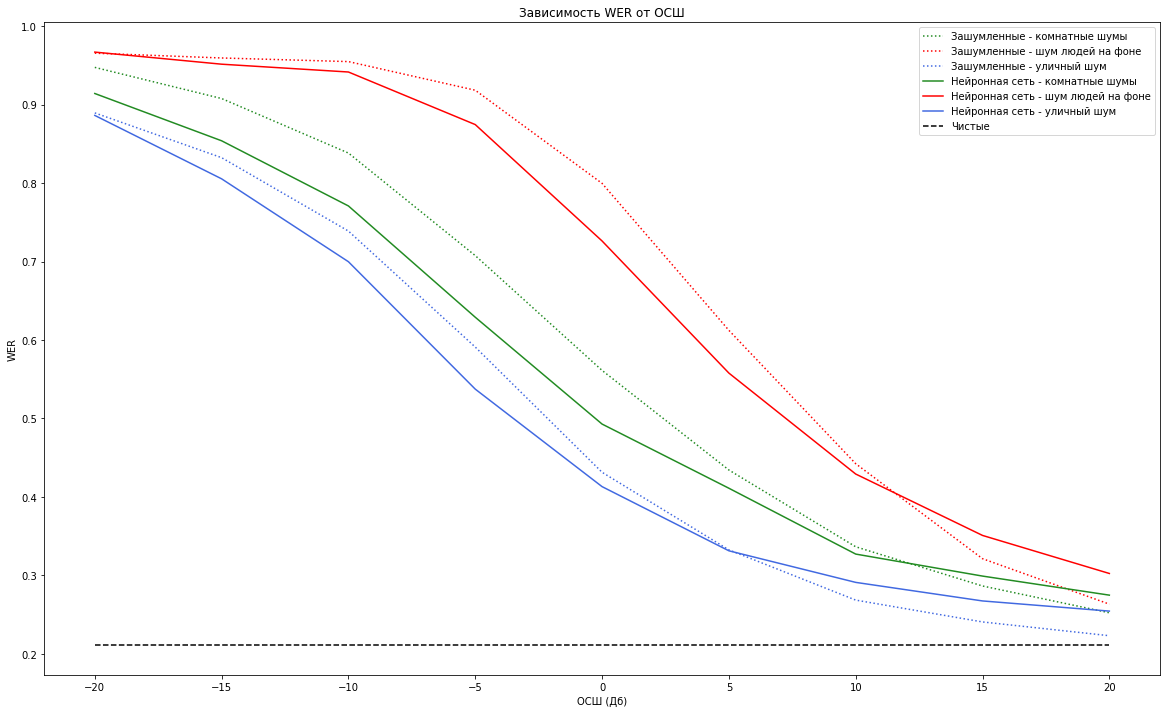

In [232]:
pretty = {
    "room": "комнатные шумы",
    "street": "уличный шум",
    "human": "шум людей на фоне"
}
cl = {
    "room":"forestgreen",
    "street": "royalblue",
    "human": "red"
}
plt.figure(figsize=(20,12))
for _type, wer_noisy in wer_noisy_res.items():
    plt.plot([x[0] for x in wer_noisy], [x[1] for x in wer_noisy], label = f'Зашумленные - {pretty[_type]}',color = cl[_type], linestyle = ':')
for _type, wer_enhanced_demucs in wer_enhanced_res.items():
    plt.plot([x[0] for x in wer_enhanced_demucs], [x[1] for x in wer_enhanced_demucs], label = f'Нейронная сеть - {pretty[_type]}', color = cl[_type])
    
plt.plot([x[0] for x in wer_clean], [x[1] for x in wer_clean], label = 'Чистые', linestyle='--',color="black")
plt.xlabel('ОСШ (Дб)')
plt.ylabel('WER')
plt.title('Зависимость WER от ОСШ')
plt.legend()
plt.savefig('WER.png')
plt.show()